In [1]:
%pylab inline
from PIL import Image
import numpy as np
from skimage import data
from skimage.feature import match_template

ImagenTotal = numpy.asarray(Image.open('Rst/OlivoTotal.png'))
#multiplesizes: small, medium, large or extra
ImagenTemplateSmall = numpy.asarray(Image.open('Rst/OlivoTemplate_small.png'))
ImagenTemplateMedium = numpy.asarray(Image.open('Rst/OlivoTemplate_medium.png'))
ImagenTemplateLarge = numpy.asarray(Image.open('Rst/OlivoTemplate_large.png'))
ImagenTemplateExtra = numpy.asarray(Image.open('Rst/OlivoTemplate_extra.png'))

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'extra')

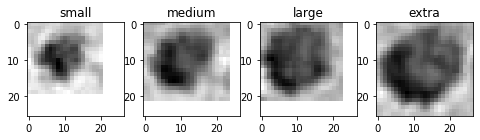

In [2]:
#notice that we work with one band
imagen = ImagenTotal[:,:,1]
arbolsmall = ImagenTemplateSmall[:,:,1]
arbolmedium = ImagenTemplateMedium[:,:,1]
arbollarge = ImagenTemplateLarge[:,:,1]
arbolextra = ImagenTemplateExtra[:,:,1]
#print(arbol)
fig = plt.figure(figsize=(8, 1.8))
ax1 = plt.subplot(1, 4, 1)
ax2 = plt.subplot(1, 4, 2,sharex=ax1,sharey=ax1)
ax3 = plt.subplot(1, 4, 3,sharex=ax1,sharey=ax1)
ax4 = plt.subplot(1, 4, 4,sharex=ax1,sharey=ax1)

ax1.imshow(arbolsmall, cmap=plt.cm.gray)
ax1.set_title('small')

ax2.imshow(arbolmedium, cmap=plt.cm.gray)
ax2.set_title('medium')

ax3.imshow(arbollarge, cmap=plt.cm.gray)
ax3.set_title('large')

ax4.imshow(arbolextra, cmap=plt.cm.gray)
ax4.set_title('extra')

In [3]:
#creating results for every tree type
#small
resultsmall = match_template(imagen, arbolsmall)
resultsmallquery = np.where(resultsmall>0.85)
#medium
resultmedium = match_template(imagen, arbolmedium)
resultmediumquery = np.where(resultmedium>0.85)
#large
resultlarge = match_template(imagen, arbollarge)
resultlargequery = np.where(resultlarge>0.85)
#extra
resultextra = match_template(imagen, arbolextra)
resultextraquery = np.where(resultextra>0.85)

In [4]:
def listapuntos(result):
    xlist = []
    ylist = []
    for punto in range(shape(result)[1]):
        xlist.append(result[1][punto])
        ylist.append(result[0][punto])
    return xlist, ylist

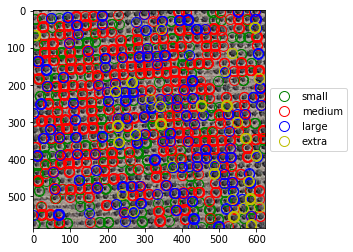

In [5]:
#show the interpreted results 
#small
plot(listapuntos(resultsmallquery)[0], listapuntos(resultsmallquery)[1], 'o', 
         markeredgecolor='g', markerfacecolor='none', markersize=10, label="small")
#medium
plot(listapuntos(resultmediumquery)[0], listapuntos(resultmediumquery)[1], 'o', 
         markeredgecolor='r', markerfacecolor='none', markersize=10, label="medium")
#large
plot(listapuntos(resultlargequery)[0], listapuntos(resultlargequery)[1], 'o', 
         markeredgecolor='b', markerfacecolor='none', markersize=10, label="large")
#extra
plot(listapuntos(resultextraquery)[0], listapuntos(resultextraquery)[1], 'o', 
         markeredgecolor='y', markerfacecolor='none', markersize=10, label="extra")
imshow(ImagenTotal[10:-10,10:-10,:])
legend(loc='center left', bbox_to_anchor=(1, 0.5))
#figure(figsize=(12,12));
figsize(24,24)